# Linear Regression : 

Linear Regressoin is the most basic and popular algorithm of machine learning. It is supervised machine learning algorithm which is predicted output is real values/continuous. Or, Relationship between input/independent variables and single output/dependent variable. 
We will get linear regression image look like : -

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png)

> ## Objective : 

To make a simple linear regression model operating on one variable from scratch using statistical formulas

### Simple Linear Regression
A linear line relationship between one input/independent variable(X) and one output/dependent variable(y).

     y = mX + b
Where, y is dependent/target variable; X is input/independent variable; m is slop of regression line; b is y-intercept.

> ## Approach : 

The model is built in the following steps 

- **Data Wrangling**
- **Data Cleaning : Missing Values** 
- **Visualisation : UniVariate** 
    
      - Histograms
      - Scatter Plot 
      - Boxplot
      
- **Parameter Functions :**
      
      - Mean and Variance
      - Co-Variance
      - Coefficients
      - Splitting Test Data
      
- **Model Building and Predictions**

- **RMSE Function building and calculation**

- **Conclusion**
      - 

## `1.` Data Wrangling

In [1]:
#load all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [3]:
#load data for train and test
train = pd.read_csv(r'C:\Users\kusht\Downloads\train (2).csv')
test = pd.read_csv(r'C:\Users\kusht\Downloads\test.csv')

**TASK : Print the head of train and test data** 

In [5]:
### START CODE (~2 lines of code)

print(train.head())
print(test.head())

### END CODE

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


**TASK : Get the shapes of training and testing data**

In [8]:
### START CODE HERE (~ 2 Lines of code)
print('Shape of training data : ' + str(train.shape))
print('Shape of testing data : ' + str(test.shape))

### END CODE 

Shape of training data : (700, 2)
Shape of testing data : (300, 2)


## `2.` Data Cleaning 

**TASK : Get info about dataset using `info()` method**

In [9]:
### START CODE HERE (~1 Line of code)
train.info()
### END CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.1 KB


- ### Missing values

**TASK : Find the numbe of missing values**

In [ ]:
### START CODE HERE (~ 2 lines of code)
print(train.isna().sum())
print(test.isna().sum())

### END CODE

**TASK : Remove instances with missing values**

In [15]:
### START CODE HERE (~2 Lines of code)
train=train.dropna()
train.isna().sum()

### END CODE

x    0
y    0
dtype: int64

**TASK : Describe the dataset**

In [16]:
### START CODE HERE (~ 1 Line of code)
train.describe()
### END CODE

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


## `3.` Visualization of train dataset

### `3.1` Histograms

**TASK : Plot a `histogram` of train dataset** 

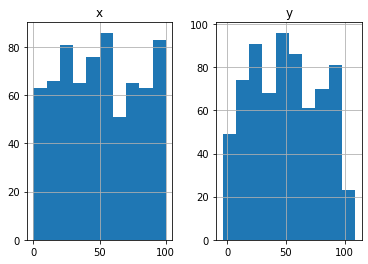

In [17]:
### START CODE HERE (~2 Lines of code)

train.hist()
plt.show()

### END CODE

### `3.2` Scatter Plot

**TASK : Plot a `scatter plot` between dependent and independent variable**

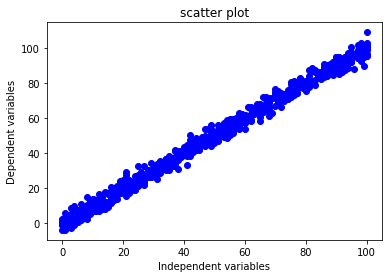

In [18]:
### START CODE HERE (FULL CODE)
## Show Xlabel , Ylabel and Title also

plt.scatter(x=train.x, y=train.y, c='blue')
plt.title('scatter plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.show()

### END CODE

**Analyse if linear regression would be a good fit on this problem** 

### `3.3` Boxplots 

**TASK : Make a `boxplot` of training data**

A better understanding of boxplot would be given by the below image

<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090">

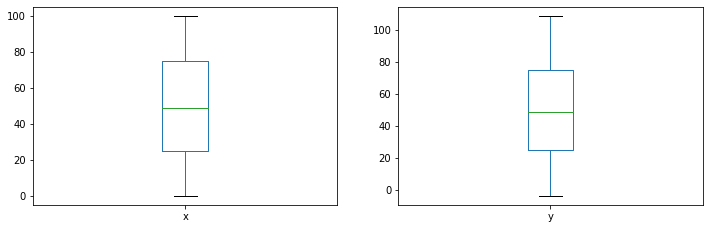

In [19]:
### START CODE HERE (~ 2 Lines of code)
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()
### END CODE

**TASK : Split into `dependent` and `independent` variable and name them `y` and `X` respectively**

In [20]:
### START CODE HERE (~ 2 Lines of code)

#Independent  Variable 
X = train.x.values
#Dependent Variable
y = train.y.values

### END CODE

## `4.` Parameter Functions

 Let's find the slop of regression line(m) and bais(y-intercept). you can find these using diffrente approaches. Like:- Ordinary Least Square approach and Gradient Descent approach.
 
- ### Ordinary Least Square
 As you know that the relationship between independent(X) variable and dependent(y) variable is know as linear regression.
 
 **Orinary Least Sqaure** - the sum of the squares of the differences between an observation’s actual and estimated values.
![Regression image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/Least-Square-Method-2-399x300.png) 
Total error of this model is the sum of all errors of each point. ie.

$$SE=\sum_{i=1}^nDi^2$$

    Di = Distance between line and ith point.
    n = Total number of points
### Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### `4.1`   Mean and Variance 
Mean of numbers can be calculated as: -

    mean(x) = sum(x) / count(x)

**TASK : Make `functions` for mean and variance**

In [22]:
### START CODE HERE (Write the code where '#' is given) 

#Calculate mean of list numbers with mean function
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#Calculate varience of list numbers with variance function
def variance(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])

### END CODE

**TASK : Find the mean and variance of X and y and store it in `X_mean` , `y_mean` , `X_variance` , `y_variance`**

In [23]:
### START CODE HERE 
X_mean, y_mean = mean(X), mean(y)
X_variance = variance(X, X_mean)
y_variance = variance(y, y_mean)
### END CODE

### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
you can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


**TASK : Create function to implement `co-variance`**

In [25]:
### START CODE HERE (Write code where '#' is given)

#Calculate the covariance of these groups
def covariance(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov
### END CODE

### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance()
    b = mean(y) - (m*mean(X))

**TASK : Make a function `coefficients()` which returns m,b**

In [26]:
### START CODE HERE (Write code where '#' is given) 

#Lets estimate with coefficient
def coefficients():
    m = covariance(X, X_mean, y, y_mean) / variance(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]
### END CODE

you have estimated the coefficients. Now, you can use them to make predictions follows by this eqation: -

       y = mX + b
 

### `4.4` Splitting Test Data 

In [30]:
#Let's seprate the test datasets and reshape it
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

## `5.` Linear Regression Model and Predictions

**TASK : Make a function to evaluate `linear_regression` with above calculated parameters**

In [28]:
### START CODE HERE (Write code where '#' is given)
#simple_linear_regression() function making here to prediction

def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

### END CODE

**TASK : Make a plot of the predictions**

In [31]:
predict = simple_linear_regression()

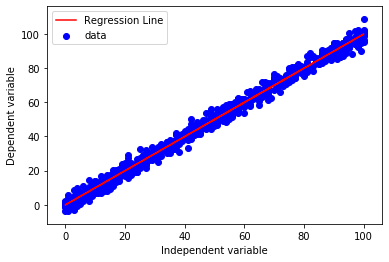

In [32]:
# Ploting Line
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='blue')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)
Here yhat is the ith predicted output values , yhat= mX + c


**TASK : Make `Root_mean_square_error` function**

In [40]:
### START CODE HERE (Write code where '#' is given) 
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    rmse = rmse[0]
    return rmse

### END CODE 

**TASK : Calculate RMSE using made function**

In [41]:
### START CODE HERE 
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
RMSE
### END CODE 

3.0713062680298298

## Conclusion